In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
##### Reading allele frequencies for whole genome #####

def fix_freqs(freqs):
    common_n = 0
    freqs = freqs.split(",")
    for freq in freqs:
        freq = freq.split(":")
        if float(freq[1]) > 0.01:
            common_n += 1
    return common_n

whole_genome_df = pd.DataFrame(columns = ['chrom','start','end','afreq','n_common'])

for i in range(1,23):
    df = pd.read_csv("/gymreklab-tscc/helia/ensembl/experiments/allele_freq/freqs/freqs_chr" + str(i) + ".tab", sep="\t")
    df = df[['chrom','start','end','afreq']]
    df['n_common'] = df.apply(lambda row : fix_freqs(row['afreq']), axis = 1)
    whole_genome_df = pd.concat([df,whole_genome_df])

whole_genome_df = whole_genome_df.drop_duplicates(keep="first", subset=['chrom','start','end'])
whole_genome_df['end'] = whole_genome_df['end'] - 1

In [8]:
##### Subsetting allele frequencing for overlap with coding regions #####
coding_regions = pd.read_csv("TR_intersect.txt",sep="\t", header=None)
coding_regions.columns = ['chrom','start','end']
coding_regions_df = pd.merge(coding_regions, whole_genome_df, on = ['chrom','start','end'])
coding_regions_df

,chrom,start,end,afreq,n_common
0,chr1,960770,960798,"CGCCGCCG:0.001,CGCCGCCGCCTCCACCGCCGCAGCCGCCG:0...",1
1,chr1,970841,970857,GTGTGTGTATGTGTGTG:1.000,1
2,chr1,976178,976199,"GCTGGGGCTGGGGCTGTGGCTG:1.000,GCTGGGGCTGGGGCTGT...",1
3,chr1,1232633,1232644,CTGCTGCTGCTG:1.000,1
4,chr1,1232807,1232818,CGCCGCCGCCGC:1.000,1
...,...,...,...,...,...
6487,chr22,50603316,50603361,GAGGAGGACGATGAGGACGAGGAAGAGGAGGAGGAGGAGGAGG:0....,1
6488,chr22,50604149,50604160,AGCAGCAGCAGC:1.000,1
6489,chr22,50604544,50604573,"CGCGCCGCCGCCGCCCGCGCCCGCCGCGCC:0.999,CGCGCCGCC...",1
6490,chr22,50604546,50604557,CGCCGCCGCCGC:1.000,1


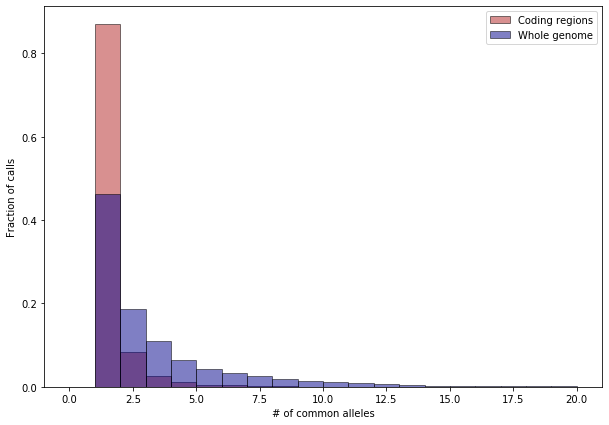

In [16]:
max_range = 20
plt.figure(figsize=(10,7))
plt.hist(coding_regions_df['n_common'], bins=max_range, density=True, \
         range = (0,max_range), alpha = 0.5, edgecolor = "black", color='firebrick', label="Coding regions")
plt.hist(whole_genome_df['n_common'], bins=max_range, density = True, \
         range = (0,max_range), alpha = 0.5, edgecolor = "black", color='darkblue', label = "Whole genome" )
plt.xlabel("# of common alleles")
plt.ylabel("Fraction of calls")
plt.legend()
plt.savefig("coding_polymorphism.pdf", dpi=1200, format='pdf')